In [1]:
import os
# Change the terminal placement to the folder where the py files  are located  
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

 You are currently in the directory: /Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code


In [2]:
from Zoro import *
from functions import *
from Zoro_MD import * 
from help_function import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [3]:
mpl.style.use('seaborn')

In [4]:
# problem set up
n = 2000
s = int(0.1*n)
# noise amplitude
noiseamp = 0.001
#noiseamp = 0 
decay_factor=0.5
x_star=tools.sparse_vector(n=n,s=s)
#obj_func = SparseQuadric(n, s, noiseamp)
#obj_func=CompressibleQuadric(n=n, decay_factor=decay_factor, noiseamp=noiseamp)
#obj_func=SparseQuadric(n, s, noiseamp)
obj_func=weakly_sparse(n,x_star, noiseamp)
# Choose initialization
x0    = np.random.randn(n)
x0    = 100*x0/np.linalg.norm(x0)
xx0   = copy.deepcopy(x0)

sparsity = s
#sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":0.5, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          "num_samples": int(np.ceil(np.log(len(x0))*sparsity))}

performance_log_ZORO = [[0, obj_func(x0)]]

In [5]:
#IHT set up 
threshold_IHT=6
step_IHT=1/(3*n)
itt_IHT=40 
C_IHT=0.8 # lamda update 
lamda_IHT=1 # threshold param 

In [6]:
#ISTA set up 
threshold_ista=2
step_ista=1/(3*n)
itt_ista=100 
C_ista=0.8 # lamda update 
lamda_ista=3 # threshold param 

In [7]:
#Original Version of the Zoro Algo with different algos for estimating the gradient
opt_Co  = ZORO(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),x_star=x_star)
opt_Lasso  = ZORO(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=30)
opt_DLasso  = ZORO(x0, obj_func, params,algo='DLasso', function_budget= int(1e6))
opt_IHT  = ZORO(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT)
opt_IHT_ad  = ZORO(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT)
opt_ista_ad  = ZORO(x0, obj_func, params,algo='ISTA_ad', function_budget= int(1e6),threshold_IHT=threshold_ista,C_IHT=C_ista,lamda_IHT=lamda_ista,itt_IHT=itt_ista,step_IHT=step_ista)
# the actual optimization routine
termination=False

In [8]:
#Original the Zoro Algo using MD and  with different algos for estimating the gradient
opt_IHT_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Co_MD  = ZORO_MD(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_IHT_ad_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)



In [9]:
performance_log_ZORO_IHT_MD,cost_x=opt_IHT_MD.Zoro_MD()

Estimated f(x_k): 10035.249256 x_k-x_star: 25.705381 function evals: 3042
Estimated f(x_k): 660.766555 x_k-x_star: 9.340985 function evals: 6084
Estimated f(x_k): 87.254000 x_k-x_star: 7.774516 function evals: 9126
Estimated f(x_k): 60.443096 x_k-x_star: 7.695896 function evals: 12168
Estimated f(x_k): 59.226836 x_k-x_star: 7.698416 function evals: 15210
Estimated f(x_k): 59.265591 x_k-x_star: 7.700435 function evals: 18252
Estimated f(x_k): 59.296668 x_k-x_star: 7.701025 function evals: 21294
Estimated f(x_k): 59.305800 x_k-x_star: 7.701175 function evals: 24336
Estimated f(x_k): 59.308115 x_k-x_star: 7.701207 function evals: 27378
Estimated f(x_k): 59.308606 x_k-x_star: 7.701210 function evals: 30420
Estimated f(x_k): 59.308641 x_k-x_star: 7.701206 function evals: 33462
Estimated f(x_k): 59.308598 x_k-x_star: 7.701199 function evals: 36504
Estimated f(x_k): 59.308482 x_k-x_star: 7.701193 function evals: 39546
Estimated f(x_k): 59.308376 x_k-x_star: 7.701187 function evals: 42588
Esti

In [10]:
performance_log_ZORO_Co_MD,cost_Co_MD=opt_Co_MD.Zoro_MD()

Estimated f(x_k): 10035.249283 x_k-x_star: 25.874109 function evals: 3042
Estimated f(x_k): 669.469466 x_k-x_star: 9.553380 function evals: 6084
Estimated f(x_k): 91.267113 x_k-x_star: 7.802042 function evals: 9126
Estimated f(x_k): 60.871861 x_k-x_star: 7.700441 function evals: 12168
Estimated f(x_k): 59.296811 x_k-x_star: 7.699317 function evals: 15210
Estimated f(x_k): 59.279528 x_k-x_star: 7.700536 function evals: 18252
Estimated f(x_k): 59.298256 x_k-x_star: 7.700913 function evals: 21294
Estimated f(x_k): 59.304017 x_k-x_star: 7.700944 function evals: 24336
Estimated f(x_k): 59.304548 x_k-x_star: 7.700896 function evals: 27378
Estimated f(x_k): 59.303787 x_k-x_star: 7.700810 function evals: 30420
Estimated f(x_k): 59.302482 x_k-x_star: 7.700721 function evals: 33462
Estimated f(x_k): 59.301100 x_k-x_star: 7.700639 function evals: 36504
Estimated f(x_k): 59.299802 x_k-x_star: 7.700542 function evals: 39546
Estimated f(x_k): 59.298348 x_k-x_star: 7.700436 function evals: 42588
Esti

In [11]:
performance_log_ZORO_IHT_ad_MD,cost__IHT_ad_x=opt_IHT_ad_MD.Zoro_MD()

Estimated f(x_k): 10035.249285 x_k-x_star: 25.679265 function evals: 3042
Estimated f(x_k): 659.424669 x_k-x_star: 9.260480 function evals: 6084
Estimated f(x_k): 85.756480 x_k-x_star: 7.763883 function evals: 9126
Estimated f(x_k): 60.277863 x_k-x_star: 7.694067 function evals: 12168
Estimated f(x_k): 59.198640 x_k-x_star: 7.698021 function evals: 15210
Estimated f(x_k): 59.259517 x_k-x_star: 7.700351 function evals: 18252
Estimated f(x_k): 59.295383 x_k-x_star: 7.701017 function evals: 21294
Estimated f(x_k): 59.305681 x_k-x_star: 7.701189 function evals: 24336
Estimated f(x_k): 59.308329 x_k-x_star: 7.701232 function evals: 27378
Estimated f(x_k): 59.308950 x_k-x_star: 7.701243 function evals: 30420
Estimated f(x_k): 59.309101 x_k-x_star: 7.701246 function evals: 33462
Estimated f(x_k): 59.309160 x_k-x_star: 7.701246 function evals: 36504
Estimated f(x_k): 59.309215 x_k-x_star: 7.701246 function evals: 39546
Estimated f(x_k): 59.309213 x_k-x_star: 7.701247 function evals: 42588
Esti

In [12]:
performance_log_ZORO_Co,cost_Co=opt_Co.Zoro()
#performance_log_ZORO_IHT=opt_IHT_ad.Zoro()
#performance_log_ZORO_DLasso=opt_DLasso.Zoro()
#performance_log_ZORO_DLasso=opt_DLasso.Zoro()

Estimated f(x_k): 10035.249329 x_k-x_star: 95.210076  function evals: 3042
Estimated f(x_k): 9064.958553 x_k-x_star: 92.961446  function evals: 6084
Estimated f(x_k): 8641.830486 x_k-x_star: 91.179038  function evals: 9126
Estimated f(x_k): 8313.617011 x_k-x_star: 89.232059  function evals: 12168
Estimated f(x_k): 7962.360349 x_k-x_star: 88.747548  function evals: 15210
Estimated f(x_k): 7876.127369 x_k-x_star: 88.125821  function evals: 18252
Estimated f(x_k): 7766.160301 x_k-x_star: 87.890700  function evals: 21294
Estimated f(x_k): 7724.775048 x_k-x_star: 87.621108  function evals: 24336
Estimated f(x_k): 7677.458545 x_k-x_star: 87.808078  function evals: 27378
Estimated f(x_k): 7710.258550 x_k-x_star: 87.805605  function evals: 30420
Estimated f(x_k): 7709.824373 x_k-x_star: 87.362173  function evals: 33462
Estimated f(x_k): 7632.149238 x_k-x_star: 87.403146  function evals: 36504
Estimated f(x_k): 7639.309919 x_k-x_star: 87.257462  function evals: 39546
Estimated f(x_k): 7613.8646

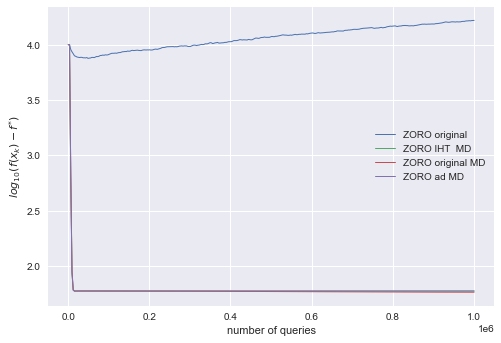

In [17]:
fig, ax = plt.subplots()
ax.plot(np.array(performance_log_ZORO_Co)[:,0],
 (np.log10(np.array(performance_log_ZORO_Co)[:,1])), linewidth=1, label = "ZORO original")
#ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 #(np.array(performance_log_ZORO_Co_MD)[:,1]), linewidth=1, label = "ZORO_MD")
ax.plot(np.array(performance_log_ZORO_IHT_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT_MD)[:,1])), linewidth=1, label = "ZORO IHT  MD")
ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_Co_MD)[:,1])), linewidth=1, label = "ZORO original MD")
ax.plot(np.array(performance_log_ZORO_IHT_ad_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT_ad_MD)[:,1])), linewidth=1, label = "ZORO ad MD")
plt.xlabel('number of queries')
plt.ylabel('$log_{10}(f(x_{k})-f^{*})$')
leg = ax.legend()
plt.show()

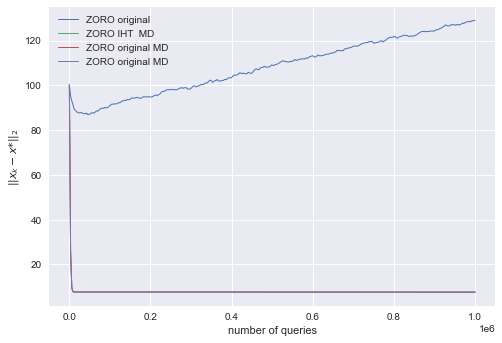

In [18]:
fig, ax = plt.subplots()
ax.plot(np.array(cost_Co)[:,0],
 (np.array(cost_Co)[:,1]), linewidth=1, label = "ZORO original")
#ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 #(np.array(performance_log_ZORO_Co_MD)[:,1]), linewidth=1, label = "ZORO_MD")
ax.plot(np.array(cost_x)[:,0],
 (np.array(cost_x)[:,1]), linewidth=1, label = "ZORO IHT  MD")
ax.plot(np.array(cost_Co_MD)[:,0],
 (np.array(cost_Co_MD)[:,1]), linewidth=1, label = "ZORO original MD")
ax.plot(np.array(cost_Co_MD)[:,0],
 (np.array(cost_Co_MD)[:,1]), linewidth=1, label = "ZORO original MD")
plt.xlabel('number of queries')
plt.ylabel('$ || x_{k}-x{*}||_{2} $')
leg = ax.legend()
plt.show()